In [1]:
%matplotlib inline
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lenna = plt.imread("lenna.png")

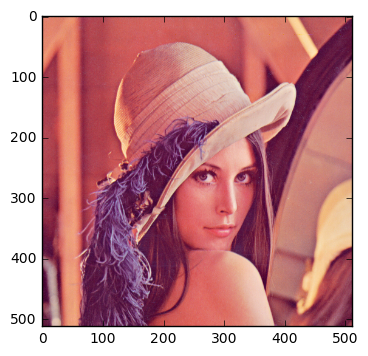

In [3]:
plt.imshow(lenna)

In [4]:
lenna.shape

(512, 512, 3)

In [5]:
lennaGray = (lenna[:,:,0]  + lenna[:,:,1] + lenna[:,:,2]) / 3

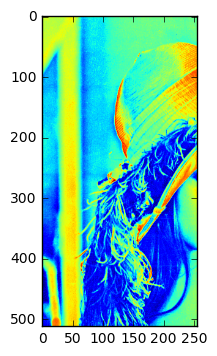

In [6]:
plt.imshow(lennaGray[:,0:255])

In [7]:
coeffs = pywt.dwt2(lennaGray,'haar')

In [8]:
cA, (cH, cV, cD) = coeffs

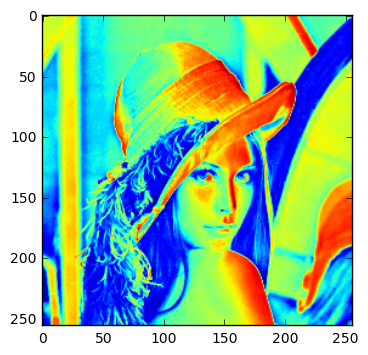

In [9]:
plt.imshow(cA)

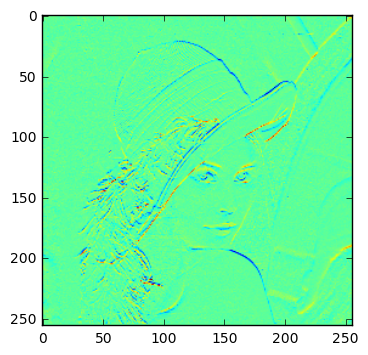

In [10]:
plt.imshow(cH)

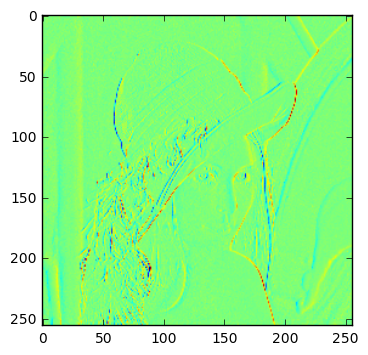

In [11]:
plt.imshow(cV)

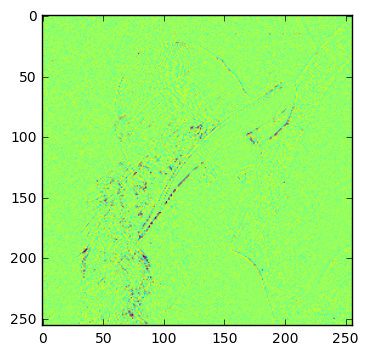

In [12]:
plt.imshow(cD)

In [31]:
def pixelDiff(image, ay, ax, by, bx, threshold):
    (height, width) = image.shape
    if 0 <= ax and ax < width and 0 <= bx and bx < width and 0 <= ay and ay < height and 0 <= by and by < height:
        a = image[ay, ax]
        b = image[by, bx]
        return np.sum((a-b)**2) <= threshold**2
    return False

In [32]:
def discoverRegion(image, raster, yseed, xseed, threshold):
    assert(raster[yseed, xseed] == -1)
    region = np.max(raster) + 1
    queue = [(yseed, xseed)]
    raster[yseed,xseed] = region

    while len(queue) > 0:
        (y,x) = queue.pop(0)
        
        for (p,q) in [(y-1,x),(y+1,x),(y,x-1),(y,x+1)]:
            if pixelDiff(image, y, x, p, q, threshold) and raster[p,q] == -1:
                raster[p,q] = region
                queue.append((p,q))        

In [33]:
def fullRegionGrow(image, threshold):
    (height, width) = image.shape
    raster = np.zeros((height, width))-1
    for y in range(height):
        for x in range(width):
            if raster[y,x] == -1:
                discoverRegion(image, raster, y, x, threshold)
    return raster

In [40]:
raster = fullRegionGrow(lennaGray, 4/256)

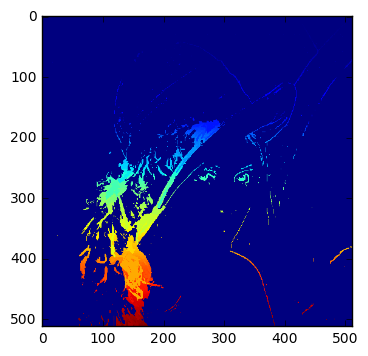

In [41]:
plt.imshow(raster)